<a href="https://colab.research.google.com/github/JinnieL/DA_with_Bigquery_and_Pandas/blob/main/1.%20Pandas%20%ED%99%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 활용 데이터
theLook eCommerce (Bigquery)  
- 커머스 데이터를 활용한 데이터 분석
- 가상의 전자상거래 의류 사이트의 데이터 세트
- 고객, 제품, 주문, 물류, 웹 이벤트 및 디지털 마케팅 캠페인에 대한 정보 포함.
- https://console.cloud.google.com/marketplace/product/bigquery-public-data/thelook-ecommerce?hl=en-GB&project=biqquery-test-408414

# Pandas 활용
참고 링크   
1. 10 minutes to pandas : https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
2. 블로그 : https://velog.io/@suminwooo/%ED%8C%8C%EC%9D%B4%EC%8D%AC-Pandas-%ED%99%9C%EC%9A%A9

- pandas : Python에서 DB처럼 테이블 형식의 데이터를 쉽게 처리할 수 있는 라이브러리
-데이터가 테이블 형식 (DB Table, csv 등)으로 이루어진 경우가 많아 데이터 분석시 자주 사용하게 될 Python 패키지

-----
# 0. Pandas 사용 방법
- pandas를 사용하기 위해서 다음과 같이 모듈을 import
- import 할 때 pandas 그대로 사용할 수도 있지만 pd라는 alias를 관례적으로 많이 사용

In [72]:
import pandas as pd
import numpy as np

# 1. Pandas의 데이터 오브젝트(Series, DataFrame) 생성
- 데이터 오브젝트 : 데이터를 담고 있는 그릇.
- Series : 1차원 데이터와 각 데이터의 위치 정보를 담는 인덱스로 구성
- DataFrame : 2차원 데이터와 인덱스, 컬럼으로 구성. (하나의 컬럼만 선택 = Series)

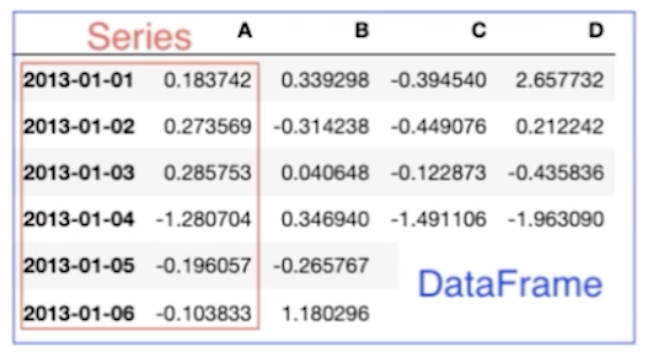

In [73]:
# Series 생성
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

,0
0,1.0
1,3.0
2,5.0
3,NaN
4,6.0
5,8.0


Series() 안에 list로 1차원 데이터 입력. index는 지정하지 않으면 자동으로 0부터 입력.

In [74]:
# DataFrame 생성 - list 사용
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=['A', 'B', 'C', 'D'])

In [75]:
df

,A,B,C,D
2013-01-01,-1.216530,-1.164280,-0.093440,0.283598
2013-01-02,-1.498057,1.813471,1.569859,-0.126010
2013-01-03,0.340876,0.278891,-0.208347,-0.691062
2013-01-04,-1.525200,0.714063,0.687870,1.260225
2013-01-05,-0.646034,-0.540999,0.920552,-1.102432
2013-01-06,1.041389,-2.301880,-0.421623,-1.457931


- 리스트 뿐만 아니라 딕셔너리 형식으로도 DataFrame 생성 가능.
- 딕셔너리 형식으로 DataFrame 생성시 dict의 key 값이 열을 정의하는 컬럼이 되며, 행을 정의하는 인덱스는 자동으로 0부터 시작하여 1씩 증가하는 정수 인덱스가 사용됨.

In [76]:
# DataFrame 생성 - dictionary 사용
df_dict = pd.DataFrame(
    {
        'A' : 1.,
        'B' : pd.Timestamp('20130101'),
        'C' : pd.Series(1, index=list(range(4)), dtype='float32'),
        'D' : np.array([3] * 4, dtype='int32'),
        'E' : pd.Categorical(['test', 'train', 'test', 'train']),
        'F' : 'str'
    }
)

In [77]:
df_dict

,A,B,C,D,E,F
0,1.0,2013-01-01,1.0,3,test,str
1,1.0,2013-01-01,1.0,3,train,str
2,1.0,2013-01-01,1.0,3,test,str
3,1.0,2013-01-01,1.0,3,train,str


# 2. 데이터 확인하기 : head(), tail()
- 처음과 끝의 일부 데이터 확인
- 데이터가 큰 경우 어떤 식으로 구성되어 있는지 확인할 때 주로 사용.

In [78]:
df.head()

,A,B,C,D
2013-01-01,-1.216530,-1.164280,-0.093440,0.283598
2013-01-02,-1.498057,1.813471,1.569859,-0.126010
2013-01-03,0.340876,0.278891,-0.208347,-0.691062
2013-01-04,-1.525200,0.714063,0.687870,1.260225
2013-01-05,-0.646034,-0.540999,0.920552,-1.102432


In [79]:
df.tail()

,A,B,C,D
2013-01-02,-1.498057,1.813471,1.569859,-0.126010
2013-01-03,0.340876,0.278891,-0.208347,-0.691062
2013-01-04,-1.525200,0.714063,0.687870,1.260225
2013-01-05,-0.646034,-0.540999,0.920552,-1.102432
2013-01-06,1.041389,-2.301880,-0.421623,-1.457931


- .index : 데이터 프레임의 인덱스 확인
- .columns : 컬럼 확인
- .values : 내부 데이터 확인

In [80]:
# 인덱스 확인
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [81]:
# 컬럼 확인
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [82]:
# 내부 데이터 확인
df.values

array([[-1.21652989, -1.16428027, -0.0934402 ,  0.28359789],
       [-1.49805721,  1.81347052,  1.56985868, -0.12600958],
       [ 0.34087599,  0.27889075, -0.20834673, -0.69106244],
       [-1.52520044,  0.71406288,  0.68786951,  1.26022518],
       [-0.64603371, -0.54099924,  0.92055182, -1.10243242],
       [ 1.04138895, -2.30188048, -0.42162329, -1.457931  ]])

 describe() : 데이터 프레임의 수치형 컬럼의 통계적인 수치 확인 가능.  
 - count : 데이터 개수
 - mean : 평균값
 - std : 표준편차
 - min : 최소값
 - 25% : 1사분위 값
 - 50% : 중앙값 (2사분위)
 - 75% : 3사분위 값
 - max : 최대값


 분위수(Quantile)     
 - 1사분위 값 : 누적 확률이 0.25가 되는 곳
 - 2사분위 값 : 누적 확률이 0.5가 되는 곳
 - 3사분위 값 : 누적 확률이 0.75가 되는 곳
 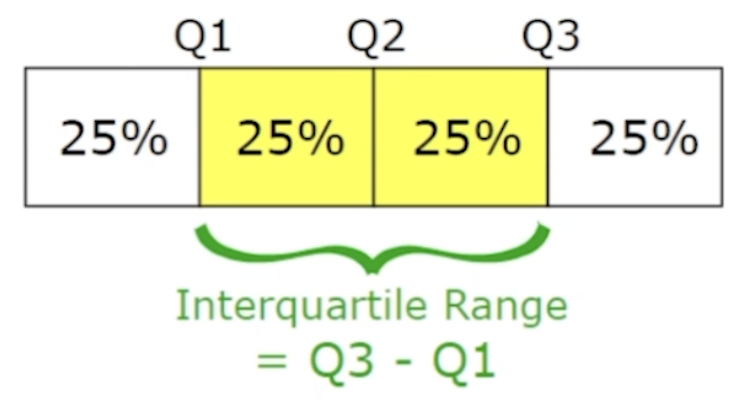


In [83]:
df_dict

,A,B,C,D,E,F
0,1.0,2013-01-01,1.0,3,test,str
1,1.0,2013-01-01,1.0,3,train,str
2,1.0,2013-01-01,1.0,3,test,str
3,1.0,2013-01-01,1.0,3,train,str


In [84]:
df_dict.describe()

,A,B,C,D
count,4.0,4,4.0,4.0
mean,1.0,2013-01-01 00:00:00,1.0,3.0
min,1.0,2013-01-01 00:00:00,1.0,3.0
25%,1.0,2013-01-01 00:00:00,1.0,3.0
50%,1.0,2013-01-01 00:00:00,1.0,3.0
75%,1.0,2013-01-01 00:00:00,1.0,3.0
max,1.0,2013-01-01 00:00:00,1.0,3.0
std,0.0,NaN,0.0,0.0


.T : 데이터 프레임에서 index와 column을 바꾼 형태의 데이터 프레임

In [85]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.216530,-1.498057,0.340876,-1.525200,-0.646034,1.041389
B,-1.164280,1.813471,0.278891,0.714063,-0.540999,-2.301880
C,-0.093440,1.569859,-0.208347,0.687870,0.920552,-0.421623
D,0.283598,-0.126010,-0.691062,1.260225,-1.102432,-1.457931


- .sort_index(), .sort_values() : 행, 열 이름을 기준으로 정렬
    - ascending : 정렬 방식(false : 내림차순, true : 오름차순)

In [86]:
df.sort_index(ascending=False)

,A,B,C,D
2013-01-06,1.041389,-2.301880,-0.421623,-1.457931
2013-01-05,-0.646034,-0.540999,0.920552,-1.102432
2013-01-04,-1.525200,0.714063,0.687870,1.260225
2013-01-03,0.340876,0.278891,-0.208347,-0.691062
2013-01-02,-1.498057,1.813471,1.569859,-0.126010
2013-01-01,-1.216530,-1.164280,-0.093440,0.283598


In [87]:
df.sort_values(by='B')

,A,B,C,D
2013-01-06,1.041389,-2.301880,-0.421623,-1.457931
2013-01-01,-1.216530,-1.164280,-0.093440,0.283598
2013-01-05,-0.646034,-0.540999,0.920552,-1.102432
2013-01-03,0.340876,0.278891,-0.208347,-0.691062
2013-01-04,-1.525200,0.714063,0.687870,1.260225
2013-01-02,-1.498057,1.813471,1.569859,-0.126010


In [88]:
# 여러 컬럼을 기준으로 정렬 (B컬럼이 같다면 C컬럼 기준으로 정렬)
df.sort_values(by=['B','C'])

,A,B,C,D
2013-01-06,1.041389,-2.301880,-0.421623,-1.457931
2013-01-01,-1.216530,-1.164280,-0.093440,0.283598
2013-01-05,-0.646034,-0.540999,0.920552,-1.102432
2013-01-03,0.340876,0.278891,-0.208347,-0.691062
2013-01-04,-1.525200,0.714063,0.687870,1.260225
2013-01-02,-1.498057,1.813471,1.569859,-0.126010


# 3. 데이터 선택하기
- 데이터 프레임 자체가 가지고 있는 인덱싱 & 슬라이싱 기능을 이용
- 특정 컬럼의 값들만 가져오고 싶다면 df['A'] (==df.A)와 같은 형태로 입력
    - return : Series 구조
- df.A로 써도 되지만 종종 오류가 날 수도 있기에 (컬럼명이 숫자나 한글이라던가..) df['A'] 방식을 추천.

In [89]:
df['A']

,A
2013-01-01,-1.216530
2013-01-02,-1.498057
2013-01-03,0.340876
2013-01-04,-1.525200
2013-01-05,-0.646034
2013-01-06,1.041389


In [90]:
type(df['A'])

pandas.core.series.Series

인덱싱과 슬라이싱
- 특정 '행 범위'를 가져오고 싶다면 다음과 같이 리스트를 슬라이싱할 때와 같이 동일하게 사용 가능.
- 예시) df[0:3] : df라는 데이터 프레임의 0, 1, 2번째 행을 가져옴
- 인덱스 명을 직접 넣어서 해당하는 행 범위를 가져올 수도 있음
- 파이썬에서 슬라이싱을 할 때 경우에 따라 마지막 값이 포함되거나 포함되지 않을 수도 있음.

참고 : https://www.notion.so/loc-iloc-8abf8fb84d994a67abc8df01a4e586a9?pvs=4

In [91]:
# 인덱싱 예시
lst = [1, 2, 3]

In [92]:
print(lst[0])
print(lst[1])
print(lst[2])

1
2
3


indexing : 입력한 인덱스에 해당하는 요소의 값을 가져옴

In [93]:
# 슬라이싱 예시
print(lst[1:])

[2, 3]


slicing : 범위를 지정해 값을 자름

In [94]:
# 맨 처음 3개의 행
df[0:3]

,A,B,C,D
2013-01-01,-1.216530,-1.164280,-0.093440,0.283598
2013-01-02,-1.498057,1.813471,1.569859,-0.126010
2013-01-03,0.340876,0.278891,-0.208347,-0.691062


In [95]:
# 인덱스명에 해당하는 값 가져오기
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1.498057,1.813471,1.569859,-0.126010
2013-01-03,0.340876,0.278891,-0.208347,-0.691062
2013-01-04,-1.525200,0.714063,0.687870,1.260225


이름을 이용하여 선택하기 : .loc
- .loc : 이름(Label)로 가져오기
- 2차원으로 구성되어 있음. → .loc[인덱스명, 컬럼명] 형식으로 접근.
- .loc[인덱스명]으로 입력하면 모든 행의 값이 결과로 나옴. (== .loc[인덱스명, :])
- .loc[선택 인덱스 리스트, 선택 컬럼 리스트] 형태로 멀티인덱싱 가능.


In [96]:
df.loc['2013-01-01', 'A']

-1.216529890652725

In [97]:
df.loc['2013-01-01']

,2013-01-01
A,-1.216530
B,-1.164280
C,-0.093440
D,0.283598


In [98]:
df.loc[:, ['A', 'B']]       # (==) df.loc[['A', 'B']]

,A,B
2013-01-01,-1.216530,-1.164280
2013-01-02,-1.498057,1.813471
2013-01-03,0.340876,0.278891
2013-01-04,-1.525200,0.714063
2013-01-05,-0.646034,-0.540999
2013-01-06,1.041389,-2.301880


In [99]:
# using loc with slicing
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-1.498057,1.813471
2013-01-03,0.340876,0.278891
2013-01-04,-1.525200,0.714063


In [100]:
df.loc['20130102', ['A', 'B']]

,2013-01-02
A,-1.498057
B,1.813471


In [101]:
print(dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [102]:
df.loc[dates[0], 'A']

-1.216529890652725

인덱스로 데이터 가져오기 : .iloc
- 인덱스 : 위치(숫자) 정보
- 2차원 구성 → .iloc[인덱스명(행 번호), 컬럼명]
- 멀티 인덱싱 가능

In [103]:
# 전체 데이터
df

,A,B,C,D
2013-01-01,-1.216530,-1.164280,-0.093440,0.283598
2013-01-02,-1.498057,1.813471,1.569859,-0.126010
2013-01-03,0.340876,0.278891,-0.208347,-0.691062
2013-01-04,-1.525200,0.714063,0.687870,1.260225
2013-01-05,-0.646034,-0.540999,0.920552,-1.102432
2013-01-06,1.041389,-2.301880,-0.421623,-1.457931


In [104]:
df.iloc[3]

,2013-01-04
A,-1.525200
B,0.714063
C,0.687870
D,1.260225


In [105]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-1.525200,0.714063
2013-01-05,-0.646034,-0.540999


In [106]:
# multi indexing
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-1.498057,1.569859
2013-01-03,0.340876,-0.208347
2013-01-05,-0.646034,0.920552


In [107]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-1.498057,1.813471,1.569859,-0.126010
2013-01-03,0.340876,0.278891,-0.208347,-0.691062


--------
조건으로 값 가져오기
- 하나의 컬럼의 다양한 조건에 따라 행들을 선택 가능
- DataFrame의 값 조건에 해당하는 것만 선택 가능.

In [108]:
# A 컬럼이 양수인 값들만 추출
df[df['A'] > 0]

,A,B,C,D
2013-01-03,0.340876,0.278891,-0.208347,-0.691062
2013-01-06,1.041389,-2.301880,-0.421623,-1.457931


In [109]:
# DataFrame 전체의 값에 대해 조건에 해당하는 값만 보이기
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,0.283598
2013-01-02,NaN,1.813471,1.569859,NaN
2013-01-03,0.340876,0.278891,NaN,NaN
2013-01-04,NaN,0.714063,0.687870,1.260225
2013-01-05,NaN,NaN,0.920552,NaN
2013-01-06,1.041389,NaN,NaN,NaN


isin 함수
- 열이 list의 값들을 포함하고 있는 모든 행들을 골라낼 때 주로 사용
- 포함하면 True, 포함하지 않으면 False 반환

In [110]:
# Ex1.
df_isin = pd.DataFrame(
    {
        'A' : [1, 2, 3],
        'B' : ['a', 'b', 'f']
    }
)
df_isin

,A,B
0,1,a
1,2,b
2,3,f


In [111]:
df_isin.isin([1, 3, 12, 'a'])

,A,B
0,True,True
1,False,False
2,True,False


In [112]:
df_isin[df_isin['A'].isin([1, 2])]

,A,B
0,1,a
1,2,b


In [113]:
# Ex2.
df2 = df.copy()

# add New Column 'E'
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-1.216530,-1.164280,-0.093440,0.283598,one
2013-01-02,-1.498057,1.813471,1.569859,-0.126010,one
2013-01-03,0.340876,0.278891,-0.208347,-0.691062,two
2013-01-04,-1.525200,0.714063,0.687870,1.260225,three
2013-01-05,-0.646034,-0.540999,0.920552,-1.102432,four
2013-01-06,1.041389,-2.301880,-0.421623,-1.457931,three


In [114]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.340876,0.278891,-0.208347,-0.691062,two
2013-01-05,-0.646034,-0.540999,0.920552,-1.102432,four


In [115]:
# df2의 E 컬럼이 'two', 'four'를 포함하지 않는 값 찾기 : use '~'
df2[~df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-01,-1.216530,-1.164280,-0.093440,0.283598,one
2013-01-02,-1.498057,1.813471,1.569859,-0.126010,one
2013-01-04,-1.525200,0.714063,0.687870,1.260225,three
2013-01-06,1.041389,-2.301880,-0.421623,-1.457931,three


데이터 변경하기
- 데이터 프레임의 값들을 다른 값으로 변경 가능
- 기존 데이터 프레임에 새로운 열을 추가하고 싶을 때는 다음과 같이 같은 인덱스를 가진 시리즈나 리스트를 입력

In [116]:
df

,A,B,C,D
2013-01-01,-1.216530,-1.164280,-0.093440,0.283598
2013-01-02,-1.498057,1.813471,1.569859,-0.126010
2013-01-03,0.340876,0.278891,-0.208347,-0.691062
2013-01-04,-1.525200,0.714063,0.687870,1.260225
2013-01-05,-0.646034,-0.540999,0.920552,-1.102432
2013-01-06,1.041389,-2.301880,-0.421623,-1.457931


In [117]:
# 새로운 열 추가
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

,0
2013-01-02,1
2013-01-03,2
2013-01-04,3
2013-01-05,4
2013-01-06,5
2013-01-07,6


In [118]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-1.216530,-1.164280,-0.093440,0.283598,NaN
2013-01-02,-1.498057,1.813471,1.569859,-0.126010,1.0
2013-01-03,0.340876,0.278891,-0.208347,-0.691062,2.0
2013-01-04,-1.525200,0.714063,0.687870,1.260225,3.0
2013-01-05,-0.646034,-0.540999,0.920552,-1.102432,4.0
2013-01-06,1.041389,-2.301880,-0.421623,-1.457931,5.0


인덱스가 존재하는 데이터프레임에 내가 원하는 컬럼을 만들 때 인덱스를 맞춰서 넣어야 한다.        
길이가 같은 단순 리스트로 만들어서 추가하든 해야한다

In [119]:
# 0번째 인덱스, 'A' 컬럼을 0으로 변경
df.iloc[0, 0] = 0             # df.loc[dates[0], 'A']
df

,A,B,C,D,F
2013-01-01,0.000000,-1.164280,-0.093440,0.283598,NaN
2013-01-02,-1.498057,1.813471,1.569859,-0.126010,1.0
2013-01-03,0.340876,0.278891,-0.208347,-0.691062,2.0
2013-01-04,-1.525200,0.714063,0.687870,1.260225,3.0
2013-01-05,-0.646034,-0.540999,0.920552,-1.102432,4.0
2013-01-06,1.041389,-2.301880,-0.421623,-1.457931,5.0


In [120]:
# 0번째 인덱스, 1번째 컬럼을 0으로 변경
df.iloc[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.093440,0.283598,NaN
2013-01-02,-1.498057,1.813471,1.569859,-0.126010,1.0
2013-01-03,0.340876,0.278891,-0.208347,-0.691062,2.0
2013-01-04,-1.525200,0.714063,0.687870,1.260225,3.0
2013-01-05,-0.646034,-0.540999,0.920552,-1.102432,4.0
2013-01-06,1.041389,-2.301880,-0.421623,-1.457931,5.0


In [121]:
# 전체 인덱스, 'D' 컬럼 데이터를 변경
df.loc[:, 'D'] = 5
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.093440,5.0,NaN
2013-01-02,-1.498057,1.813471,1.569859,5.0,1.0
2013-01-03,0.340876,0.278891,-0.208347,5.0,2.0
2013-01-04,-1.525200,0.714063,0.687870,5.0,3.0
2013-01-05,-0.646034,-0.540999,0.920552,5.0,4.0
2013-01-06,1.041389,-2.301880,-0.421623,5.0,5.0


# 4. 결측 데이터
- 여러가지 이유로 모든 데이터를 측정하지 못하는 경우가 종종 발생하게 됨.
- 결측치 : 측정되지 못해 비어있는 데이터. pandas에서는 np.nan으로 나타냄.
- pandas에서는 기본적으로 결측치를 제외하고 연산.
- 머신러닝이나 딥러닝의 경우 결측치가 존재한다면 코드가 오류나는 경우도 있기 때문에 항상 데이터 분석을 하기 전에 결측치를 확인해야함.
- reindex()를 통해 컬럼이나 인덱스를 추가, 삭제, 변경 등의 작업 가능.

In [122]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.093440,5.0,NaN
2013-01-02,-1.498057,1.813471,1.569859,5.0,1.0
2013-01-03,0.340876,0.278891,-0.208347,5.0,2.0
2013-01-04,-1.525200,0.714063,0.687870,5.0,3.0
2013-01-05,-0.646034,-0.540999,0.920552,5.0,4.0
2013-01-06,1.041389,-2.301880,-0.421623,5.0,5.0


In [123]:
# 결측 데이터를 만들기 위한 'E' 컬럼 생성
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.093440,5.0,NaN,1.0
2013-01-02,-1.498057,1.813471,1.569859,5.0,1.0,1.0
2013-01-03,0.340876,0.278891,-0.208347,5.0,2.0,NaN
2013-01-04,-1.525200,0.714063,0.687870,5.0,3.0,NaN


drop() : DataFrame의 dropna()를 통해 결측 데이터 삭제.    
    - how='any' : 값들 중 하나라도 NaN이면 삭제   
    - how='all' : 값들이 모두 NaN이면 삭제    
    - axis=0 : NaN이 있는 행 기준으로 삭제    
    - axis=1 : NaN이 있는 열 기준으로 삭제    

In [124]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.093440,5.0,NaN,1.0
2013-01-02,-1.498057,1.813471,1.569859,5.0,1.0,1.0
2013-01-03,0.340876,0.278891,-0.208347,5.0,2.0,NaN
2013-01-04,-1.525200,0.714063,0.687870,5.0,3.0,NaN


In [125]:
df1.dropna(how='all')       # 행의 모든 값이 NaN일 경우 삭제. # 원본 데이터가 변경되길 원한다면 inplace=True 설정

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.093440,5.0,NaN,1.0
2013-01-02,-1.498057,1.813471,1.569859,5.0,1.0,1.0
2013-01-03,0.340876,0.278891,-0.208347,5.0,2.0,NaN
2013-01-04,-1.525200,0.714063,0.687870,5.0,3.0,NaN


In [126]:
df1.dropna(how='any')         # 행에서 NaN이 하나라도 있으면 삭제. # 원본 데이터가 변경되길 원한다면 inplace=True 설정

,A,B,C,D,F,E
2013-01-02,-1.498057,1.813471,1.569859,5.0,1.0,1.0


결측 데이터 채우기
- DataFrame의 fillna()를 통해 결측 데이터를 다른 값으로 대체 가능.
- 보통 평균, 중앙값, 최빈값으로 대체하거나 그룹화된 값으로 대푯값을 찾아 대체하기도 함.
- 결측치가 소수라면 제거하기도 함.
- 머신러닝을 통해 예측값으로 대체하기도 함.

In [127]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.093440,5.0,NaN,1.0
2013-01-02,-1.498057,1.813471,1.569859,5.0,1.0,1.0
2013-01-03,0.340876,0.278891,-0.208347,5.0,2.0,NaN
2013-01-04,-1.525200,0.714063,0.687870,5.0,3.0,NaN


In [128]:
df1.fillna(5)       # 원본 데이터에 적용하길 원한다면 inplace=True 설정

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.093440,5.0,5.0,1.0
2013-01-02,-1.498057,1.813471,1.569859,5.0,1.0,1.0
2013-01-03,0.340876,0.278891,-0.208347,5.0,2.0,5.0
2013-01-04,-1.525200,0.714063,0.687870,5.0,3.0,5.0


- isna() : 해당 값이 결측치인지 여부를 확인
    - 결측치일 경우 True, 아니면 False
    - isna().sum() : 결측치의 합 계산(True는 1로 계산)

In [129]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [130]:
# 컬럼별 결측치 개수 확인
pd.isna(df1).sum()

,0
A,0
B,0
C,0
D,0
F,1
E,2


# 5. 연산
- 통계적 지표가 계산 가능
- 평균 구하기
    - axis=1 : 인덱스 기준
    - axis=0 : 컬럼 기준 (default)

In [131]:
# 평균
df.mean()

,0
A,-0.381171
B,-0.006076
C,0.409145
D,5.000000
F,3.000000


In [132]:
# 인덱스 기준으로 평균 확인
df.mean(1)        # == df.mean(axis=1)

,0
2013-01-01,1.226640
2013-01-02,1.577054
2013-01-03,1.482284
2013-01-04,1.575346
2013-01-05,1.746704
2013-01-06,1.663577


함수 적용 : apply()
- 데이터에 대해 정의된 함수들이나 lambda 식을 이용하여 새로운 함수 적용

In [133]:
# Ex. 누적합
df1.apply(np.cumsum)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.093440,5.0,NaN,1.0
2013-01-02,-1.498057,1.813471,1.476418,10.0,1.0,2.0
2013-01-03,-1.157181,2.092361,1.268072,15.0,3.0,NaN
2013-01-04,-2.682382,2.806424,1.955941,20.0,6.0,NaN


In [134]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.093440,5.0,NaN,1.0
2013-01-02,-1.498057,1.813471,1.569859,5.0,1.0,1.0
2013-01-03,0.340876,0.278891,-0.208347,5.0,2.0,NaN
2013-01-04,-1.525200,0.714063,0.687870,5.0,3.0,NaN


In [135]:
# lambda 식과 함께 사용해서 최대-최소 계산
df1.apply(lambda x : x.max() - x.min())

,0
A,1.866076
B,1.813471
C,1.778205
D,0.000000
F,2.000000
E,0.000000


# 6. Merge
- 다양한 정보를 데이터가 있을 때 데이터들을 하나로 합쳐서 새로운 데이터로 만들어야 할 때 사용.
- concat() : 같은 형태의 자료들을 이어 하나로 만듦
- merge() : 다른 형태의 자료들을 한 컬럼을 기준으로 합침.
    - 데이터베이스에서 사용하는 SQL 스타일의 합치기 기능. merge 메소드를 통해 이루어짐.

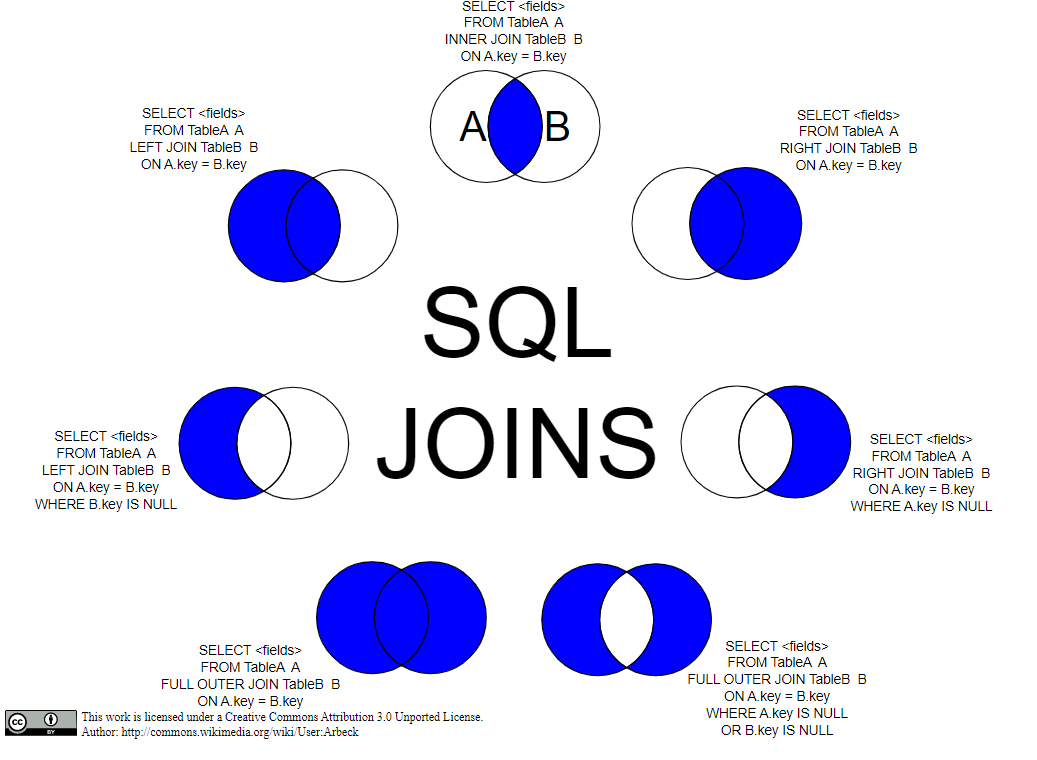

In [136]:
# concat : 단순 합침 (sql의 Union). 모든 컬럼이 같을 때 위아래로 단순 합치기
# concat을 이용하여 pandas 오브젝트들을 일렬로 연결
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.296464,1.463652,0.200545,0.719598
1,1.405892,1.205580,1.305030,-1.342103
2,-0.919585,-0.828740,0.701973,0.180458
3,0.498240,0.407216,1.621593,0.925068
4,-1.188467,0.099169,0.360530,-1.382247
5,-0.359757,0.740739,-0.281733,-0.819918
6,2.077938,-1.182319,-1.767024,-1.234387
7,0.324768,0.714293,-1.777914,-0.672214
8,-0.068819,-1.004043,0.107144,0.444322
9,-0.393391,-0.776312,-0.339946,1.028245


In [137]:
# 테스트 용으로 데이터 분리
pieces = [df[:3], df[3:7], df[7:]]
pieces[0]

,0,1,2,3
0,-0.296464,1.463652,0.200545,0.719598
1,1.405892,1.205580,1.305030,-1.342103
2,-0.919585,-0.828740,0.701973,0.180458


In [138]:
# pieces 연결 (웬만하면 컬럼이 동일할 때 주로 사용. 예를 들어 google sheet 같은)
pd.concat(pieces)

,0,1,2,3
0,-0.296464,1.463652,0.200545,0.719598
1,1.405892,1.205580,1.305030,-1.342103
2,-0.919585,-0.828740,0.701973,0.180458
3,0.498240,0.407216,1.621593,0.925068
4,-1.188467,0.099169,0.360530,-1.382247
5,-0.359757,0.740739,-0.281733,-0.819918
6,2.077938,-1.182319,-1.767024,-1.234387
7,0.324768,0.714293,-1.777914,-0.672214
8,-0.068819,-1.004043,0.107144,0.444322
9,-0.393391,-0.776312,-0.339946,1.028245


In [139]:
# merge (sql의 join) : concat 보다 주로 사용됨.
# Ex1.
left = pd.DataFrame({'key' : ['foo', 'foo'], 'lval' : [1, 2]})
right = pd.DataFrame({'key' : ['foo', 'foo'], 'rval' : [4, 5]})
merged = pd.merge(left, right)
merged

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [140]:
# Ex2.
left = pd.DataFrame({'key' : ['foo', 'bar'], 'lval' : [1, 2]})
right = pd.DataFrame({'key' : ['foo', 'bar'], 'rval' : [4, 5]})
merged = pd.merge(left, right, on='key')

In [141]:
merged

,key,lval,rval
0,foo,1,4
1,bar,2,5


# 7. Grouping
- SQL과 유사한 group by에 관련된 내용
    - splitting : 어떤 기준으로 데이터를 나눔.
    - applying : 각 그룹에 어떤 함수를 독립적으로 적용
    - combining : 적용되어 나온 결과들을 통합

위의 예시처럼 같은 그룹의 합을 계산하거나 .agg() 함수를 통해 여러 값을 확인 가능.
- ex) df.groupby('A').agg(['min', 'max'])

In [142]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

In [143]:
df

,A,B,C,D
0,foo,one,-0.874715,-0.649003
1,bar,one,1.580330,0.035847
2,foo,two,0.042162,0.716863
3,bar,three,-0.083313,-0.926586
4,foo,two,1.791826,0.933081
5,bar,two,0.163394,-0.089312
6,foo,one,-0.785209,-0.338541
7,foo,three,1.562113,0.468093


In [ ]:
## SQL문을 python으로
# SELECT A, SUM(B), SUM(C)
# FROM data
# GROUP BY A

In [146]:
df.groupby('A').sum()

,B,C,D
A,,,
bar,onethreetwo,1.660411,-0.980052
foo,onetwotwoonethree,1.736177,1.130494


In [147]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    1.580330  0.035847
    three -0.083313 -0.926586
    two    0.163394 -0.089312
foo one   -1.659924 -0.987544
    three  1.562113  0.468093
    two    1.833988  1.649945

In [148]:
# 같은 그룹의 합 계산
df.groupby('A').agg(['min', 'max'])

B              C                   D          
     min  max       min       max       min       max
A                                                    
bar  one  two -0.083313  1.580330 -0.926586  0.035847
foo  one  two -0.874715  1.791826 -0.649003  0.933081

agg() 함수를 사용하여 여러개의 열에 여러가지 함수를 적용 가능.    
- 모든열에 여러 함수를 매핑 : group객체.agg([함수1,함수2,함수3,…])      
- 각 열마다 다른 함수를 매핑 : group객체.agg({‘열1’: 함수1, ‘열2’:함수2, …})



# 8. Reshaping
- pivot table?
    - 피봇 테이블 : 커다란 표(데이터베이스, 스프레드시트, BI 프로그램 등)의 데이터를 요약하는 통계
    - 요약에는 합계, 평균, 기타 통계가 포함될 수 있으며, 피벗 테이블이 이들을 의미있는 방식으로 묶어줌

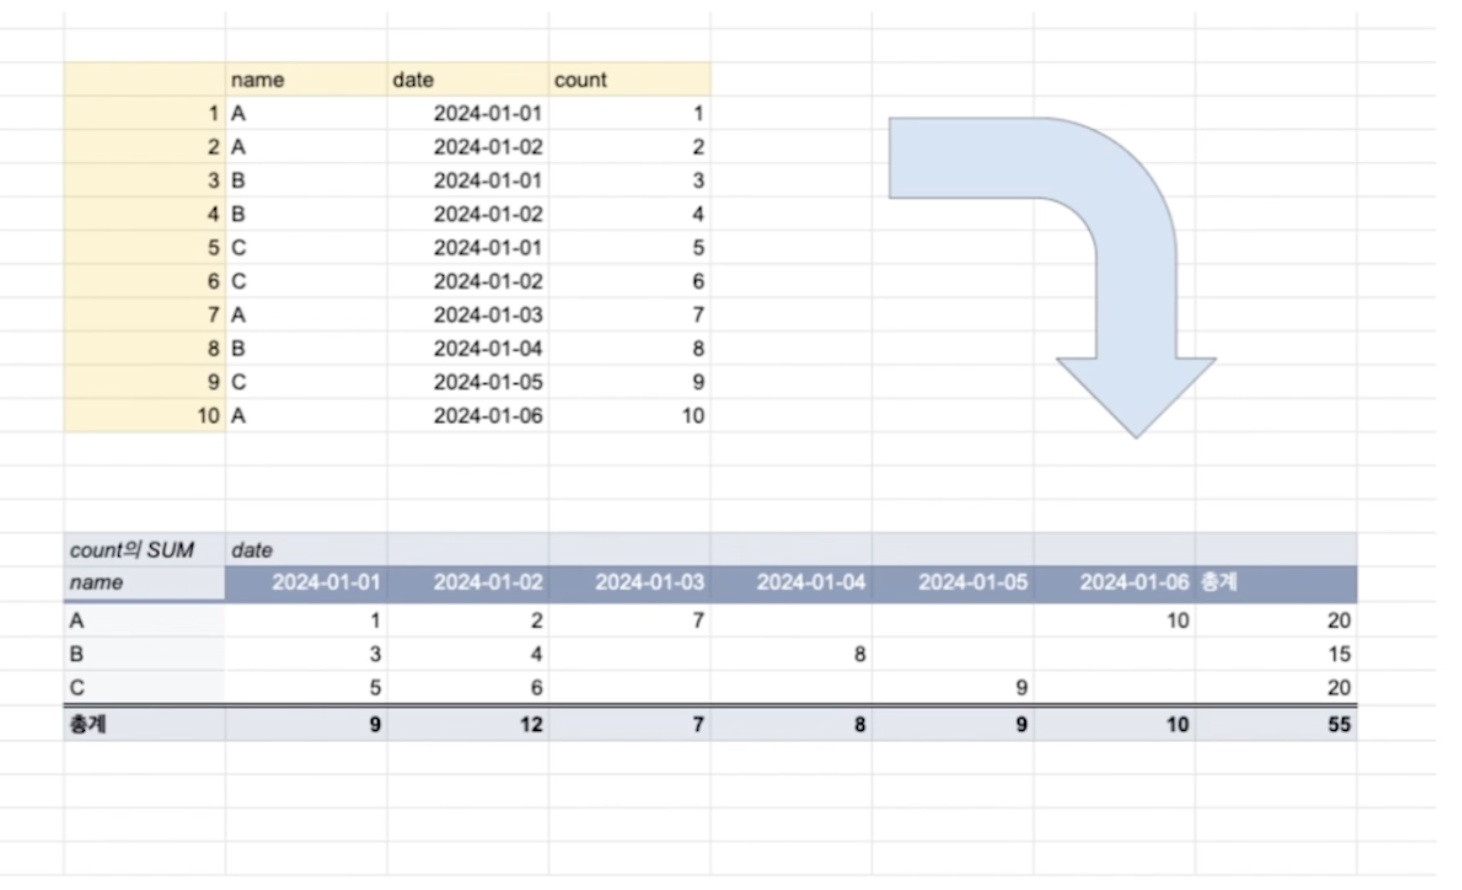

In [149]:
# 피봇 테이블
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [150]:
df

,A,B,C,D,E
0,one,A,foo,0.393271,-2.374298
1,one,B,foo,-0.587243,0.665516
2,two,C,foo,0.634209,-0.324580
3,three,A,bar,0.518635,-0.076841
4,one,B,bar,0.984423,-0.850021
5,one,C,bar,0.999489,0.001323
6,two,A,foo,-0.616720,-0.148353
7,three,B,foo,0.651007,0.554047
8,one,C,foo,-1.171749,-0.388112
9,one,A,bar,-0.363404,0.195296


In [151]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.363404  0.393271
      B  0.984423 -0.587243
      C  0.999489 -1.171749
three A  0.518635       NaN
      B       NaN  0.651007
      C -1.258415       NaN
two   A       NaN -0.616720
      B -0.745851       NaN
      C       NaN  0.634209